하나님이 세상을 이처럼 사랑하사 독생자를 주셨으니 이는 그를 믿는 자마다 멸망하지 않고 영생을 얻게 하려 하심이라 (요3:16)

-------
<img src="https://github.com/idebtor/DSpy/blob/6b3676c3de29f85d2e7f30679676d1fd96d88b17/images/WelcomeToDataStructures.jpg?raw=true" width=1000>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

--------

<b style="font-size:30px"> Chapter 4.4 Recursive Graphics  </b>
    
1. Turtle Graphics   
1. Koch Curves (코흐 곡선)   
1. Sierpinski Triangle (시에르핀스키 삼각형)

# Turtle Graphics

이전 장에서는 재귀 기능을 사용하여 해결하기 쉬운 몇 가지 문제를 살펴보았지만, 재귀 함수에서 발생하는 것을 시각화하는 방법이나 모델을 찾는 것은 여전히 어려울 수 있습니다. 이 장에서는 재귀 기능을 사용하여 흥미로운 그림을 그리는 예를 살펴보겠습니다. 재귀 프로세스에 대한 새로운 통찰력을 얻을 수 있기를 기대합니다.



Python has a built-in module named `turtle`. See the Python `turtle` module API for details. 

There are always four steps you need to do in order to use the turtle module:
1. Import the `turtle` module. If we skip this step, there’ll be no turtle to control.
1. Create a turtle to control.
1. Draw things. Do stuff. This will also automatically create the screen.
1. Run `turtle.done()`. 

## 자주 사용하는 Turtle 함수들... 
- fd(dist): turtle moves forward by dist
- bk(dist): turtle moves backward by dist 
- lt(angle): turtle turns left angle degrees 
- rt(angle): turtle turns right angle degrees 
- pu(): (pen up) turtle raises pen in belly 
- pd(): (pen down) turtle lower pen in belly 
- pensize(width): sets the thickness of turtle's pen to width 
- pencolor(color): sets the color of turtle's pen to color 
- heading(): returns the direction in which the turtle is  pointing
- setheading(angle): sets the direction in which the turtle is  pointing
- position(): returns the position of the turtle
- goto(x, y): moves the turtle to position x, y
- speed(number): set the speed of the turtle movement
- shape(shp): sets the turtle's shape to shp
- home(): turtle returns to (0,0) (center of screen) 
- clear(): delete turtle drawings; no change to turtle's state 
- reset(): delete turtle drawings; reset turtle's state 
- setup(width, height): create a turtle window of given width and height

### Example 1: Drawing a square.

We can rotate the turtle in order to draw more interesting figures.

In [1]:
%%writefile tom.py
# Step 1: Make all the "turtle" commands available to us.
import turtle

# Step 2: Create a new turtle. We'll call it "tom"
tom = turtle.Turtle()

# Step 3: Move in the direction Tom's facing for 50 pixels
tom.forward(50)
tom.right(90)     # Rotate clockwise by 90 degrees

tom.forward(50)
tom.right(90)

tom.forward(50)
tom.right(90)

tom.forward(50)
tom.right(90)

# Step 4: We're done!
turtle.done()            # it keeps the window alive

Writing tom.py


In [2]:
!python tom.py

### Example 2: Drawing a square (using loops)

To avoid the DRY, wouldn’t it be great if we could just tell Python to repeat the code for us?

In [5]:
%%writefile square_loop.py
import turtle
smart = turtle.Turtle()

turtle.setup(500,500)    # set up window size

for i in range(4):
    smart.forward(50)
    smart.right(90)

# Step 4: We're done!
turtle.done()           # it keeps the window alive

Overwriting square_loop.py


In [6]:
!python square_loop.py

### Example 3: Drawing a star

Why did I pick the number “144”? Why is that significant? What happens if you try changing a different number?

In [7]:
%%writefile star.py
import turtle
star = turtle.Turtle()

for i in range(10):
    star.forward(100)
    star.right(144)

turtle.done()

Writing star.py


In [8]:
!python star.py

### Example 4: Drawing a spiral star

In [12]:
%%writefile spiral_star.py
import turtle
spiral = turtle.Turtle()

for i in range(20):
    spiral.forward(i * 10)
    spiral.right(144)
    
turtle.done()

Overwriting spiral_star.py


In [14]:
!python spiral_star.py

여기서 루프를 돌 때마다 직선의 길이가 10, 20, 30 ... 으로 증가하는 것을 볼 수 있습니다. 루프 인덱스 i에 10을 곱하는 것 대신에, i * i를 하면 어떻게 될까요? 

In [ ]:
%%writefile spiral_star.py
import turtle
spiral = turtle.Turtle()

for i in range(20):
    spiral.forward(i * i)
    spiral.right(144)
    
turtle.done()

In [ ]:
!python spiral_star.py

### Example 5: Changing line color

In [15]:
%%writefile change_color.py
import turtle 

painter = turtle.Turtle()
painter.pencolor("blue")

for i in range(50):
    painter.forward(50)
    painter.left(123) # Let's go counterclockwise this time 
    
painter.pencolor("red")
for i in range(50):
    painter.forward(100)
    painter.left(123)
    
turtle.done()

Writing change_color.py


In [16]:
!python change_color.py

# Koch curves (코흐 곡선)

코흐 곡선은 수학의 곡선으로 가장 처음에 나온 프랙탈 중의 하나이다. 1904년 스웨덴의 수학자 헬리에 폰 코흐의 논문 Sur une courbe continue sans tangente, obtenue par une construction géométrique élémentaire에 처음 등장하여 그런 이름이 붙었다고 합니다. (Wikipedia) 시작하는 도형이 정삼각형인 경우 코흐 눈송이(영어: Koch snowflake)라 하고 다음과 같이 만들 수 있습니다.

1. 정삼각형을 그린다.
1. 각 변을 3등분해서, 한 변의 길이가 이 3등분의 길이와 같은 정삼각형을 붙인다.
1. 2.의 과정을 무한히 반복한다.


## Step 1 - Draw a basic unit
다음과 같은 코흐 곡선(order = 0)를 그립니다. 
<center><img src="https://github.com/idebtor/DSpy/blob/62221af5f2458982596597f041ca42e8b9b5046e/images/chap4/Koch_curve1.png?raw=true" width="50%"></center>
<center>그림 1. 코흐 곡선 order = 0 </center>

In [17]:
%%writefile koch_unit.py
from turtle import *
a = 100
reset()
clear()
forward(a/3)
left(60)

forward(a/3)
right(120)

forward(a/3) 
left(60)

forward(a/3)
done()             # it keeps the window alive

In [ ]:
!python koch_unit.py

이 코흐 곡선은 다음과 같이 간략히 코딩할 수 있습니다. 

<center><img src="https://github.com/idebtor/DSpy/blob/85b886e3c06fc460583be3b9be5f0d069550d73e/images/chap4/Koch_curve1-1.png?raw=true" width="40%"></center>

<center>그림 2. 코흐 곡선 order = 0 </center>

In [5]:
%%writefile koch_unit.py
# this code is the same as one above
from turtle import *
a = 100
reset()
clear()
for t in [60, -120, 60, 0]:
    forward(a/3)
    left(t)
    
done()

Overwriting koch_unit.py


In [6]:
!python koch_unit.py

## Step 2 - Draw a basic unit using a function and an order

<center><img src="https://github.com/idebtor/DSpy/blob/85b886e3c06fc460583be3b9be5f0d069550d73e/images/chap4/Koch_curve2.png?raw=true" width="50%"></center>

<center>그림 3. 코흐 곡선 order = 0 and order = 1</center>

In [1]:
%%writefile koch.py
from turtle import *

def koch(a, order):
    if order > 0:
        for t in [60, -120, 60, 0]:
            forward(a/3)
            left(t)
    else:
        forward(a)

reset()
clear()
koch(100, 0)

#pensize(3)
#koch(100, 1)

Writing koch.py


In [2]:
!python koch.py

## Step 3 - Apply a simple rule to each side recursively

Replace the forward(a/3) with another call to koch, to draw a kinked line of the same length. 
The variable order goes down by one each time, and when it hits zero, we just draw a line. Change the function koch, just a little:

<center><img src="https://github.com/idebtor/DSpy/blob/3f39c18784e4bde8fd66b63e51c0de54c10a4223/images/chap4/Koch_curve3.png?raw=true" width="50%"></center>

<center>그림 3. 코흐 곡선 order = 2</center>

In [9]:
%%writefile koch.py
from turtle import *

def koch(a, order):
    if order > 0:
        for t in [60, -120, 60, 0]:
            koch(a/3, order - 1)
            left(t)
    else:
        forward(a)

if __name__ == "__main__":
    reset()
    clear()
    koch(300, 2)
    done()

Overwriting koch.py


In [10]:
!python koch.py

## Step 4 - Make a Koch snowflake
아래 __Sample Code__ 와 같이, 코흐 곡선 3개를 120도씩 돌려서 연결하면 눈송이가 됩니다. 또한 order를 올리면 좀 더 세밀한 가장자리를 가진 눈송이를 표현할 수 있습니다. 

__Sample Code:__ 
```
for i in range(3):
    koch(200, 2)
    right(120)
```

아래 그림과 세개의 눈송이들을 바로 옆에 붙여서 만들어 보는 것은 여러분이 직접 시도해볼 것을 권장합니다. cursor가 눈송이를 가리지 않도록 감추어 보기도 하고, 눈송이를 좋아하는 색으로 채워보기도 하십시오. 

<center><img src="https://github.com/idebtor/DSpy/blob/a0ac00cc07b8f0cea72fa0778e6458397d3a1972/images/chap4/Koch_curve4.png?raw=true" width="50%"></center>

<center>그림 4. 코흐 곡선 order = 2, 3 and 4</center>

In [ ]:
for i in range(3):
    koch(200, 2)
    right(120)

In [11]:
%%writefile snow.py
from turtle import *

def koch(a, order):
    if order > 0:
        for t in [60, -120, 60, 0]:
            koch(a/3, order - 1)
            left(t)
    else:
        forward(a)

for i in range(3):
    koch(200, 3)       # try here: order 2, 3, 4
    right(120)
    
done()

Overwriting snow.py


In [12]:
!python snow.py

## Sierpinski Triangle (시에르핀스키 삼각형)

프랙탈(fractal)은 일부 조각이 전체와 비슷한 기하하적 형태를 말합니다. 이런 특징을 자기 유사성(self similarity)이라고 하며, 다시 말해 자기 유사성을 갖는 기하하적 구조를 프랙탈 구조라고 합니다. 대표적인 예로 시에르핀스키 삼각형이 있습니다.

손으로 시에르핀스키 삼각형을 그리는 절차는 간단합니다.
1. 정삼각형 하나에서 시작한다.
1. 정삼각형의 세 변의 중점을 이으면 원래의 정삼각형 안에 작은 정삼각형이 만들어진다. 이 작은 정삼각형을 제거한다.
1. 남은 정삼각형들에 대해서도 2를 실행한다.
1. 3을 무한히 반복한다.

이것을 반복하면 다음과 같은 도형이 얻어집니다.

<center><img src="https://github.com/idebtor/DSpy/blob/main/images/chap4/sierpinski.png?raw=true" width="40%"></center>
<center>그림 5. 시에르핀스키 삼각형</center>

여기서 base case는 무엇일까요? 우리는 base case가 임의로 삼각형을 조각으로 나누고자 하는 횟수로 설정된다는 것을 알게 될 것입니다. 이 숫자를 프랙탈의 __도(degree)__ 라고 부릅니다. 재귀 호출을 할 때마다 0이 될 때까지 정도에서 1을 뺍니다. 그리고 0에 도달하면 재귀 호출을 중지합니다.

In [3]:
%%writefile sierpinski.py
from turtle import *

def draw_triangle(pts, color):
    fillcolor(color)
    up()
    goto(pts[0][0], pts[0][1])
    down()
    begin_fill() ## drawing start
    goto(pts[1][0], pts[1][1])
    goto(pts[2][0], pts[2][1])
    goto(pts[0][0], pts[0][1])
    end_fill()  ## drawing end
    
def get_mid(p1, p2):
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)

def sierpinski(pts, degree):
    colormap = ["blue", "red", "green", "white", "yellow", "violet", "orange"]
    draw_triangle(pts, colormap[degree])
    if degree > 0:
        sierpinski([pts[0], get_mid(pts[0], pts[1]), get_mid(pts[0], pts[2])], degree - 1)
        sierpinski([pts[1], get_mid(pts[0], pts[1]), get_mid(pts[1], pts[2])], degree - 1)
        sierpinski([pts[2], get_mid(pts[2], pts[1]), get_mid(pts[0], pts[2])], degree - 1)
        
if __name__ == '__main__':
    Turtle()
    pts = [[-180, -150], [0, 150], [180, -150]]  ## init 3 points in canvas
    sierpinski(pts, 5)  ## degree is 5
    done()

Overwriting sierpinski.py


In [4]:
!python sierpinski.py

이 문제를 풀기위한 핵심 알고리즘이 구현된 `sierpinski()`함수를 보도록 하겠습니다.
```python
def sierpinski(pts, degree):
    colormap = ["blue", "red", "green", "white", "yellow", "violet", "orange"]
    draw_triangle(pts, colormap[degree])
    if degree > 0:
        sierpinski([pts[0], get_mid(pts[0], pts[1]), get_mid(pts[0], pts[2])], degree - 1)
        sierpinski([pts[1], get_mid(pts[0], pts[1]), get_mid(pts[1], pts[2])], degree - 1)
        sierpinski([pts[2], get_mid(pts[2], pts[1]), get_mid(pts[0], pts[2])], degree - 1)
```

`sierpinski()`가 하는 첫번째 일은 바깥쪽 삼각형을 그리는 것입니다. 다음으로, 세 개의 재귀 호출이 있습니다. 중간점을 연결할 때 받는 각각의 새로운 코너 삼각형에 대해 하나씩입니다. 코드를 보고 삼각형이 그려질 순서를 생각해 보세요.

`get_mid()`는 두 개의 끝점으로 인수를 사용하고 그 사이의 중간 지점을 반환합니다.

함수 호출의 다이어그램 측면에서 재귀 알고리즘을 생각해보는 것도 도움이 됩니다. `그림2`는 시에르핀스키 삼각형 문제에서 재귀 호출이 왼쪽으로 이동한다는 것을 보여줍니다. 활성 함수는 검은색으로 윤곽이 그려지고 비활성 함수는 회색으로 표시됩니다.

<center><img src="https://github.com/idebtor/DSpy/blob/main/images/chap4/ch4-7.jpg?raw=true" width="500"></center>
<center>그림6. 시에르핀스키 삼각형 구조</center>

# Summary

이번 장에서는 시에르핀스키 삼각형을 직접 구현해보며 재귀를 시각화하여 관찰해보았습니다. 이 문제를 잘 이해하면, 다음 Exercise에 나오는 `Stacking Boxes` 문제도 어렵지 않게 완성할 수 있을 것입니다. 

# Exercises 

## `koch.py` 모듈 사용하기 
다음에 코드 셀에 있는 koch.py은 코흐 곡선을 만들어 냅니다. koch.py를 수정하여 snow.py가 작동할 수 있도록 하십시오. 단, `!python koch.py`을 실행하면 코흐 곡선을 만들어 내야 하고, 이를 또한 snow.py에서 import하여 사용할 수 있어야 합니다. 


__Sample Run:__    
`!python koch.py`

<center><img src="https://github.com/idebtor/DSpy/blob/3f39c18784e4bde8fd66b63e51c0de54c10a4223/images/chap4/Koch_curve3.png?raw=true" width="30%"></center>
<center>코흐 곡선 order = 2</center>

`!python snow.py`
<center><img 
src="https://github.com/idebtor/DSpy/blob/f986219db8ec2bc8a887b2e1079fd8332a56b388/images/chap4/Koch_snowflake.png?raw=true" width="20%"></center>

<center>snow with order = 2</center>

__Your solution here: 다음 셀을 수정하십시오.__

In [ ]:
%%writefile koch.py
from turtle import *

def koch(a, order):
    if order > 0:
        for t in [60, -120, 60, 0]:
            koch(a/3, order - 1)
            left(t)
    else:
        forward(a)

reset()
clear()
koch(300, 2)

done()

In [ ]:
!python koch.py

In [ ]:
다음 셀은 수정할 필요가 없습니다. 

In [ ]:
%%writefile snow.py
from turtle import *
from koch import * 

for i in range(3):
    koch(200, 2)       # try here: order 2, 3, 4
    right(120)
    
done()

In [ ]:
!python snow.py

## 눈꽃 세송이 그리기 
다음과 같은 눈꽃 세송이를 그리십시오. 

__Sample Run:__
<center><img src="https://github.com/idebtor/DSpy/blob/a0ac00cc07b8f0cea72fa0778e6458397d3a1972/images/chap4/Koch_curve4.png?raw=true" width="50%"></center>

__Your Solution Here:__

In [ ]:
%%writefile snow3.py
from turtle import *
from koch import * 

None

In [14]:
!python snow3.py

## `polygon()` function 코딩하기

아래와 같은 다양한 다각형을 만드는 함수 `polygon()` 코딩을 하십시오. 주어진 것은 다각형 변의 수와 그 변의 길이입니다. 

__Sample Run:__
```
if __name__ == '__main__':
    polygon(3, 100)
    polygon(4, 100)
    polygon(5, 75)
    polygon(6, 60)
    polygon(7, 50)
    polygon(100, 3)
```

<center><img src="https://github.com/idebtor/DSpy/blob/82f7dd7627bbc83f047ff9b879973ab58966177c/images/chap4/polygon.png?raw=true" width="700"></center>
<center>그림1. Polygons </center>

In [5]:
%%writefile polygon.py
from turtle import *

def polygon(nsides, length):
    angle = 360.0 / nsides 

    for i in range(nsides):
        forward(length)
        right(angle)
        
if __name__ == '__main__':
    Turtle()
    polygon(3, 100)
    polygon(4, 100)
    polygon(5, 75)
    polygon(6, 60)
    polygon(7, 50)
    polygon(100, 3)
    print('end')
    done()             # keeps the window alive

Writing polygon.py


In [6]:
!python polygon.py

end


# Problem Based Learning

## Stacking Boxes

여기서 재귀 함수를 사용하여, 그림과 같이 Box들을 쌓는 프로그램을 작성하고자 합니다. 

<center><img src="https://github.com/idebtor/DSpy/blob/e2d088c7d2495ab51f898ac420ba88d58d7d2dc4/images/chap4/box1.png?raw=true" width="300"></center>
<center>그림2. Stack boxes</center>

참고로, 위의 그림을 그릴 때, degree에 따라는 `colormap[degree]`입니다. 

```
colormap = ["#unused", "#BBAAEE", "#BBBBEE", "#CCBBEE", "#CCCCEE", "#DDCCEE", "#DDDDEE", "#EEDDEE", "#EEEEEE"]
```

이러한 작업을 위하여 필요한 함수는 모두 2개이며, 아래와 같이 정의할 수 있습니다 

```
def draw_box(x, y, side, color):   
    """x, y - the origin of the box to draw at lower left corner
       side - the length of the side of the box
       color - fill color for the box """

def stack_boxes(x, y, side, degree):
    """x, y - the origin of the box to draw at lower left corner
       side - the length of the side of the box
       degree - number of boxes to stack side or top. 
            assume the max degree is limited to 8. """
```

이 두 함수를 이용하여, 왼쪽 하단에 있는 가장 큰 square를 먼저 그립니다. 그리고 오른쪽과 위쪽에 가장 큰 square의 반의 크기로 재귀적으로 그리면 됩니다. 

### Step 1. Box들 만들기 - iterative
이러한 문제를 해결하기 위해, 우리가 만들어야 할 여러 개의 box들을 원점(0,0)에 만들어 놓는 일을 반복문과 재귀 용법을 구현합니다.  

- 그림을 그릴 창의 왼쪽 하단 코너를 원점(0, 0)로 설정합니다. 
- box의 크기는 2의 재곱(power of 2)으로 시작합니다. 
- easy coloring을 위해 `degree`의 최대값은 8로 제한합니다. 
- `degree`는 곧 box의 갯수를 결정합니다. 아래 그림은 `degree = 6`일 경우입니다. 
- `draw_box()`는 주어지는 box의 원점에 시작을 하고, 또한 마치도록 합니다. 
- `box`의 `fillcolor`는 `degree`에 따라 `colormap[degree]`으로 설정합니다.

__Sample Run:__
```
from turtle import *

if __name__ == '__main__':
    Turtle()
    setworldcoordinates(0, 0, 600, 600)
    stack_boxes(0, 0, 256, 6) 
```

__Expected Output(Iteration and Recursion):__
<center><img src="https://github.com/idebtor/DSpy/blob/d10f3b17ad47a35f0c25a62d7d7210fd2276fd78/images/chap4/box4.png?raw=true" width="300"></center>
<center>그림 3: Stack boxes at the origin</center>

__Define draw_box() here__

여기서 정의하는 `draw_box()`함수로 모든 크기와 색의 box들을 그리게 됩니다. 이번에는 이 함수를 `box.py`에 저장하고 `import`로 불러서 사용하기로 합니다.  

In [ ]:
%%writefile box.py
from turtle import *

def draw_box(x, y, side, color):   
    """x, y - the origin of the box to draw at lower left corner
    side - the length of the side of the box
    color - fill color for the box """
    pass

__Iterative Solution:__
`stack_boxes()` 함수 안에서는 draw_boxes()를 반복적으로 호출하여 box들을 모두 원점에서 쌓아둡니다. 

In [ ]:
%%writefile stackboxes1.py
from turtle import *
from box import *
   
def stack_boxes(x, y, side, degree):
    """x, y - the origin of the box to draw at lower left corner
       side - the length of the side of the box
       degree - number of boxes to stack side or top. 
            assume the max degree is limited to 8. """
    pass
    
if __name__ == '__main__':
    Turtle()
    setworldcoordinates(0, 0, 600, 600)
    stack_boxes(0, 0, 256, 6) 
    print('end')
    done()             

In [ ]:
!python stackboxes1.py

### Step 2. Box들 만들기 - recursive

__Recursive Solution:__
`stack_boxes()` 함수 안에서 draw_boxes()을 호출하는 코드는 단 1회만 있지만, 사실상 재귀적으로 `stack_boxes()` 함수가 여러 차례 호출됨으로 말미암아 box들이 모두 원점에 쌓이게 됩니다.  

In [9]:
%%writefile stackboxes2.py
from turtle import *
from box import *

def stack_boxes(x, y, side, degree):
    """x, y - the origin of the box to draw at lower left corner
       side - the length of the side of the box
       degree - number of boxes to stack side or top. 
            assume the max degree is limited to 8. """
    colormap = ["#unused", "#BBAAEE", "#BBBBEE", "#CCBBEE", "#CCCCEE", "#DDCCEE", "#DDDDEE", "#EEDDEE", "#EEEEEE"]
    
    # your code here
    
    return
    
if __name__ == '__main__':
    Turtle()
    setworldcoordinates(0, 0, 600, 600)
    stack_boxes(0, 0, 256, 6) 
    print('end')
    done()             # keeps the window alive

Overwriting stackboxes2.py


In [10]:
!python stackboxes2.py

end


### Step 3. Box들을 옆으로 쌓기와 위로 쌓기
이러한 문제를 해결하기 위해 box들을 가로 방향으로 그리는 먼저 시도한 후, 또한 단순히 `stack_boxes()`의 인자만 바꾸어도 Box들이 위로 쌓아 질 수 있도록 각각 코딩하십시오. 

__Expected Output:__
<table><tr>
<td><img src="https://github.com/idebtor/DSpy/blob/1119aa37ba73d1285e52cc500f8b30e32799b9d0/images/chap4/box2.png?raw=true" width="300"></td>
<td><img src="https://github.com/idebtor/DSpy/blob/e249c211e5ea1a8740ba34785877fa2274ab5a9d/images/chap4/box3.png?raw=true" width="300"></td>
</tr></table>
<center>그림4. Stack boxes at the bottom and at the top</center>

__Solution: Stack boxes at the bottom:__

In [6]:
#%%writefile stackboxes3.py
from turtle import *
from box import *

def stack_boxes(x, y, side, degree):
    colormap = ["#unused", "#BBAAEE", "#BBBBEE", "#CCBBEE", "#CCCCEE", "#DDCCEE", "#DDDDEE", "#EEDDEE", "#EEEEEE"]
   
    # your code here
    
    return
    
if __name__ == '__main__':
    Turtle()
    setworldcoordinates(0, 0, 600, 600)
    stack_boxes(0, 0, 256, 6) 
    print('end')
    done()             # keeps the window alive

In [ ]:
!python stackboxes3.py

__Solution: Stack boxes at the top:__

In [1]:
from turtle import *
from box import *

def stack_boxes(x, y, side, degree):
    colormap = ["#unused", "#BBAAEE", "#BBBBEE", "#CCBBEE", "#CCCCEE", "#DDCCEE", "#DDDDEE", "#EEDDEE", "#EEEEEE"]
   
    # your code here
    
    return
    
if __name__ == '__main__':
    Turtle()
    setworldcoordinates(0, 0, 600, 600)
    stack_boxes(0, 0, 256, 6) 
    print('end')
    done()             # keeps the window alive

### Step 4. Stacking Boxes 완성하기

이제 `stack_baxes()`함수를 재귀적으로 두 번, 즉 오른쪽으로 쌓는 경우와 윗쪽으로 쌓는 경우, 호출하면 완성이 됩니다. 

__Sample Run:__
```
if __name__ == '__main__':
    Turtle()
    setworldcoordinates(0, 0, 600, 600)
    stack_boxes(0, 0, 256, 6) 
```

__Expected Output:__
<center><img src="https://github.com/idebtor/DSpy/blob/e2d088c7d2495ab51f898ac420ba88d58d7d2dc4/images/chap4/box1.png?raw=true" width="300"></center>
<center>그림4. 완성된 Stacking boxes</center>

__Solution:__

In [1]:
#%%writefile stackboxes4.py
from turtle import *
from box import *

def stack_boxes(x, y, side, degree):
    """x, y - the origin of the box to draw at lower left corner
       side - the length of the side of the box
       degree - number of boxes to stack side or top. 
                assume the max degree is limited to 8. """
    colormap = ["#unused", "#BBAAEE", "#BBBBEE", "#CCBBEE", "#CCCCEE", "#DDCCEE", "#DDDDEE", "#EEDDEE", "#EEEEEE"]
    
    # your code here
    
    return
    
if __name__ == '__main__':
    Turtle()
    setworldcoordinates(0, 0, 600, 600)
    stack_boxes(0, 0, 256, 6) 
    print('end')
    done()             # keeps the window alive

In [ ]:
!python stackboxes4.py

### Step 5: Pile up more boxes in boxes
아래에 있는 오른쪽 그림과 같이 Box안에 Box를 채우는 것도 stack_boxes()함수를 재귀적으로 한번 더 호출함으로 가능합니다. 시도해 보십시오. 

__Sample Run:__
```
if __name__ == '__main__':
    Turtle()
    setworldcoordinates(0, 0, 600, 600)
    stack_boxes(0, 0, 256, 6) 
```

__Expected Output(rightside):__
<table><tr>
<td><img src="https://github.com/idebtor/DSpy/blob/e2d088c7d2495ab51f898ac420ba88d58d7d2dc4/images/chap4/box1.png?raw=true" width="300"></td>
<td><img src="https://github.com/idebtor/DSpy/blob/1ecf8fee11dcb92ef771a8ad0ac5ffcf4f56b120/images/chap4/box5.png?raw=true" width="300"></td>
</tr></table>

<center>그림6. Piling up more boxes inside boxes</center>

In [ ]:
#%%writefile stackboxes5.py
from turtle import *
from box import *

def stack_boxes(x, y, side, degree):
    pass
    
if __name__ == '__main__':
    Turtle()
    setworldcoordinates(0, 0, 600, 600)
    stack_boxes(0, 0, 256, 6) 
    print('end')
    done()             # keeps the window alive

In [ ]:
!python stackboxes5.py

### Step 6: Coloring boxes
지금까지 코드에서는 `colormap`의 크기가 `degree`에 제한되어 있으며, 만약 `degree`를 더 크게 변경한다면, `colormap`을 수정하며, 손으로 직접 하나씩 인코딩해야 했습니다. 이러한 제약을 제거하기 위하여, 아래 주어진 `color_fader()`함수를 이용하여 `colormap`를 계산하는 방법으로 colorful box들을 만들어 보십시오. 이를 위해서는 `stack_boxes()`를 호출하기 전에 `colormap`을 만들고, 이를 함수의 인자로 추가해야 합니다. 

__Sample Run:__
```
if __name__ == '__main__':
    Turtle()
    setworldcoordinates(0, 0, 600, 600)
    side = 256
    degree = 6
    cmap = [ None ]  # your code here using list comprehension
    stack_boxes(0, 0, side, degree, cmap) 
```

__Samples of Expected Output:__
<table><tr>
<td><img src="https://github.com/idebtor/DSpy/blob/f82e8356b9d9e4f71a8c2a8956417c12c71bbdc2/images/chap4/box6.png?raw=true" width="200"></td>
<td><img src="https://github.com/idebtor/DSpy/blob/f82e8356b9d9e4f71a8c2a8956417c12c71bbdc2/images/chap4/box7.png?raw=true" width="200"></td>
<td><img src="https://github.com/idebtor/DSpy/blob/f82e8356b9d9e4f71a8c2a8956417c12c71bbdc2/images/chap4/box8.png?raw=true" width="200"></td>
<td><img src="https://github.com/idebtor/DSpy/blob/f82e8356b9d9e4f71a8c2a8956417c12c71bbdc2/images/chap4/box9.png?raw=true" width="200"></td>
</tr></table>

<center>그림7. Coloring boxes</center>

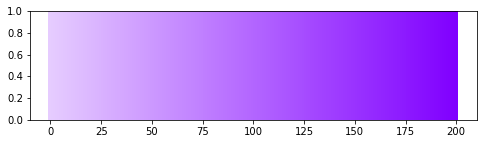

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy

def color_fader(c1,c2,mix=0): 
    #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1 = numpy.array(mpl.colors.to_rgb(c1))
    c2 = numpy.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

if __name__ == '__main__':
    c1 = '#e6ccff'    #light purple     c1 = 'lime' 
    c2 = '#8000ff'    #dark purple      c2 = 'cyan' 
    n = 200
    fig, ax = plt.subplots(figsize=(8, 2))
    for x in range(n+1):
        ax.axvline(x, color=color_fader(c1,c2,x/n), linewidth=4) 
    plt.show()

In [12]:
%%writefile stackboxes6.py
from turtle import *
from box import *

def stack_boxes(x, y, side, degree, colormap):
    pass
       
if __name__ == '__main__':
    Turtle()
    setworldcoordinates(0, 0, 600, 600)
    side = 256
    degree = 6
    cmap = [ None ]
    stack_boxes(0, 0, side, degree, cmap) 
    print('end')
    done()             # keeps the window alive

Overwriting stackboxes6.py


In [13]:
!python stackboxes6.py

end


# References
- Turtle Graphics [Here](https://en.wikipedia.org/wiki/Turtle_graphics)
- Turtle Color [Here](https://trinket.io/docs/colors)
- Problem Solving with Algorithms and Data Structures using Python   
    5.7. Introduction: Visualizing Recursion  [Here](https://runestone.academy/runestone/books/published/pythonds/Recursion/pythondsintro-VisualizingRecursion.html)


------
하나님이 세상을 이처럼 사랑하사 독생자를 주셨으니 이는 그를 믿는 자마다 멸망하지 않고 영생을 얻게 하려 하심이라 (요3:16)